### Time Series: How to remove stagionality (and trend)

* work on the difference TS

In [1]:
import numpy as np

import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# This code has been inspired by the Coursera Course: https://www.coursera.org/learn/tensorflow-sequences-time-series-and-prediction

# functions
FIGSIZE = (9, 6)

# for plotting
def plot_series(time, series, format='-', start=0, end=None):
    plt.figure(figsize=FIGSIZE)
    plt.plot(time[start:end], series[start:end], format)
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.grid(True)
    
# parameters for the TS
BASELINE = 10
SLOPE = 0.02
AMPLITUDE = 15
PERIOD = 365
NOISE_LEVEL = 1
N_PERIODS = 5

time = np.arange(N_PERIODS*PERIOD+1, dtype="float32")

# time è un vett. numpy
def trend(time, slope=0.):
    return slope * time

def noise(time, noise_level=1., seed=None):
    rnd = np.random.RandomState(seed)
    return rnd.randn(len(time)) * noise_level

# seasonality
def seasonal_pattern(season_time):
    return np.where(season_time < 0.4,
            np.cos(season_time*2*np.pi),
                    1./np.exp(3*season_time))

def seasonality(time, period, amplitude, phase=0.):
    season_time = ((time + phase) % period)/period
    return amplitude * seasonal_pattern(season_time)

def create_series(time):
    series = BASELINE + trend(time, slope=SLOPE) + seasonality(time, period=PERIOD, amplitude=AMPLITUDE) + noise(time, noise_level=NOISE_LEVEL, seed=42) 
    
    return series

In [3]:
# creo la serie temporale
series = create_series(time)

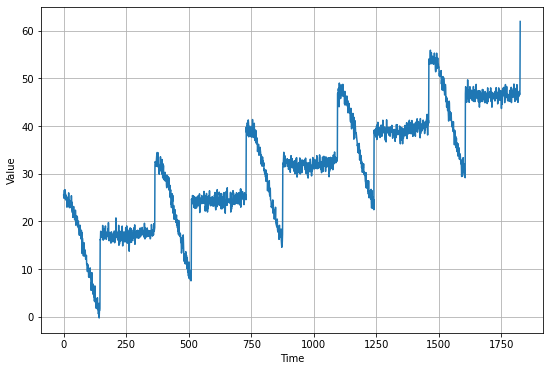

In [4]:
# grafico la serie
plot_series(time, series, format='-', start=0, end=None)

### let's do the difference

With the difference TS(t) - TS(t- PERIOD) we remove stagionality and in this case also trend (it is linear)

In [5]:
# last part
series1 = series[PERIOD:]

# the first part
series2 = series[:-PERIOD]

series_diff = series1 - series2

time_diff = np.arange(len(series_diff))

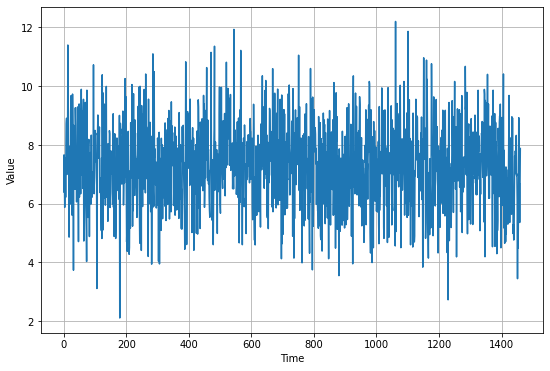

In [6]:
plot_series(time_diff, series_diff, format='-', start=0, end=None)

#### differencing I remove trend and stagionality and I can work on a stationary TS

In [7]:
# I can return back adding series2

abs_pred = series_diff + series2

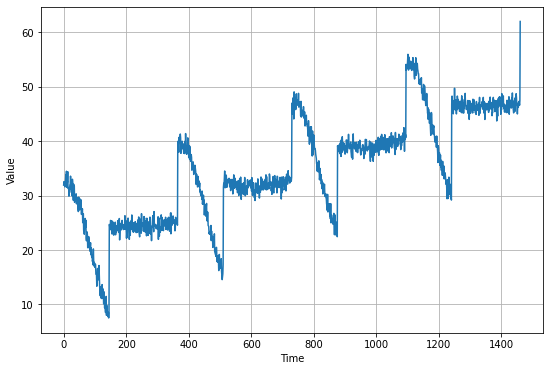

In [8]:
plot_series(time_diff, abs_pred, format='-', start=0, end=None)